#  1.Feature Selection

모듈 및 데이터 로드

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf

전기차 충전량 데이터가 있는 아파트 데이터 셋 불러오기

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 전기차_충전량있는_아파트_데이터.csv to 전기차_충전량있는_아파트_데이터 (1).csv


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('전기차_충전량있는_아파트_데이터.csv', encoding='cp949')

In [ ]:
df.head()

,아파트,주소,Latitude,Longitude,평당가,완속_충전소,완속_제외_충전소,주변충전소,충전량,세대수,주차장대수,전기차대수,충전횟수,전국민추정_앱_사용자수,사용시간대_레이블합,사용기록건수,평균사용시간대,주변그리드당_인구_평균,주변그리드당_생산가능인구_평균,주변_그리드당_공시지가_평균
0,동일하이빌2차아파트,경기도 용인시 기흥구 언남동 언남로 15,37.293337,127.127509,19651754.80,18,1,19,6629.7,837,1495,17.528192,350,31270.728,17963,4842,3.709831,102.819048,69.234921,7.238132e+05
1,심곡마을광교힐스테이트,경기도 용인시 수지구 상현동 수지로 75,37.303249,127.079651,32531921.25,107,3,110,9179.5,860,1679,17.179152,702,58840.478,28701,7769,3.694298,175.771429,123.006349,1.157098e+06
2,흥덕마을5단지호반베르디움,경기도 용인시 기흥구 영덕동 흥덕1로79번길 37,37.277575,127.070062,33008458.26,25,1,26,5592.6,527,587,16.161922,302,23926.894,14355,3917,3.664794,86.135838,61.768786,5.767350e+05
3,화성파크드림아파트,경기도 용인시 기흥구 보라동 한보라2로 93,37.248670,127.112150,15086174.08,10,1,11,2718.8,311,614,6.641881,175,35912.144,19588,5353,3.659256,101.463492,72.107937,6.683595e+05
4,만현마을 쌍용3차,경기도 용인시 수지구 상현동 만현로 99,37.307404,127.086741,25331875.44,63,1,64,4618.0,375,677,7.490909,240,59448.850,31199,8355,3.734171,209.656250,146.512500,1.100011e+06


In [ ]:
df.columns

Index(['아파트', '주소', 'Latitude', 'Longitude', '평당가', '완속_충전소', '완속_제외_충전소',
       '주변충전소', '충전량', '세대수', '주차장대수', '전기차대수', '충전횟수', '전국민추정_앱_사용자수',
       '사용시간대_레이블합', '사용기록건수', '평균사용시간대', '주변그리드당_인구_평균', '주변그리드당_생산가능인구_평균',
       '주변_그리드당_공시지가_평균'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   아파트               60 non-null     object 
 1   주소                60 non-null     object 
 2   Latitude          60 non-null     float64
 3   Longitude         60 non-null     float64
 4   평당가               60 non-null     float64
 5   완속_충전소            60 non-null     int64  
 6   완속_제외_충전소         60 non-null     int64  
 7   주변충전소             60 non-null     int64  
 8   충전량               60 non-null     float64
 9   세대수               60 non-null     int64  
 10  주차장대수             60 non-null     int64  
 11  전기차대수             60 non-null     float64
 12  충전횟수              60 non-null     int64  
 13  전국민추정_앱_사용자수      60 non-null     float64
 14  사용시간대_레이블합        60 non-null     int64  
 15  사용기록건수            60 non-null     int64  
 16  평균사용시간대           60 non-null     float64
 17 

결측치가 없음을 확인함

In [ ]:
df.isnull().sum()

아파트                 0
주소                  0
Latitude            0
Longitude           0
평당가                 0
완속_충전소              0
완속_제외_충전소           0
주변충전소               0
충전량                 0
세대수                 0
주차장대수               0
전기차대수               0
충전횟수                0
전국민추정_앱_사용자수        0
사용시간대_레이블합          0
사용기록건수              0
평균사용시간대             0
주변그리드당_인구_평균        0
주변그리드당_생산가능인구_평균    0
주변_그리드당_공시지가_평균     0
dtype: int64

## Correlation Analysis

In [ ]:
preprocessed_df = df[['평당가', '완속_충전소', '완속_제외_충전소',
       '주변충전소', '충전량', '세대수', '주차장대수', '전기차대수', '충전횟수', '전국민추정_앱_사용자수',
       '사용시간대_레이블합', '사용기록건수', '평균사용시간대', '주변그리드당_인구_평균', '주변그리드당_생산가능인구_평균','주변_그리드당_공시지가_평균']]

In [ ]:
preprocessed_df.corr(method = 'pearson')

,평당가,완속_충전소,완속_제외_충전소,주변충전소,충전량,세대수,주차장대수,전기차대수,충전횟수,전국민추정_앱_사용자수,사용시간대_레이블합,사용기록건수,평균사용시간대,주변그리드당_인구_평균,주변그리드당_생산가능인구_평균,주변_그리드당_공시지가_평균
평당가,1.000000,0.335946,0.204029,0.338484,0.262118,0.231288,0.196976,-0.169466,0.283081,0.541829,0.536191,0.533726,0.402570,0.492420,0.492762,0.517958
완속_충전소,0.335946,1.000000,0.387181,0.999419,0.101096,0.072485,0.204884,-0.252157,0.112758,0.389635,0.357651,0.352631,0.438403,0.407474,0.385550,0.208872
완속_제외_충전소,0.204029,0.387181,1.000000,0.418368,-0.157787,-0.185663,-0.110825,-0.382928,-0.087526,0.463222,0.481959,0.478725,0.257073,0.441071,0.429261,0.383748
주변충전소,0.338484,0.999419,0.418368,1.000000,0.093761,0.064545,0.197738,-0.262553,0.107845,0.400951,0.370136,0.365071,0.441375,0.417706,0.395672,0.219942
충전량,0.262118,0.101096,-0.157787,0.093761,1.000000,0.571441,0.565289,0.278644,0.867492,0.058927,0.052794,0.050336,0.221247,0.109265,0.101927,0.012031
세대수,0.231288,0.072485,-0.185663,0.064545,0.571441,1.000000,0.915728,0.682182,0.444979,0.117238,0.115166,0.112126,0.126883,0.100497,0.088137,-0.023585
주차장대수,0.196976,0.204884,-0.110825,0.197738,0.565289,0.915728,1.000000,0.586064,0.431568,0.186818,0.176446,0.171743,0.224223,0.169703,0.147070,-0.004430
전기차대수,-0.169466,-0.252157,-0.382928,-0.262553,0.278644,0.682182,0.586064,1.000000,0.177561,-0.301945,-0.292750,-0.292420,-0.275152,-0.302439,-0.303057,-0.308097
충전횟수,0.283081,0.112758,-0.087526,0.107845,0.867492,0.444979,0.431568,0.177561,1.000000,0.090124,0.083321,0.082346,0.179949,0.101923,0.098708,0.056384
전국민추정_앱_사용자수,0.541829,0.389635,0.463222,0.400951,0.058927,0.117238,0.186818,-0.301945,0.090124,1.000000,0.991541,0.991514,0.272003,0.892416,0.877357,0.819085


In [ ]:
plt.rc('font', family='NanumBarunGothic')

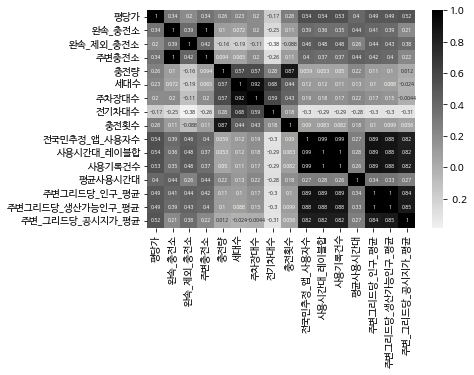

<Figure size 72000x68400 with 0 Axes>

In [ ]:
#Heatmap
cmap = sns.light_palette("black", as_cmap=True)
sns.heatmap(preprocessed_df.corr(), annot=True, annot_kws = {'size': 5}, cmap=cmap)
plt.figure(figsize = (1000,950))
plt.show()

표준화

In [ ]:
#Robust 스케일링 적용
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
output = scaler.fit_transform(preprocessed_df)
output = pd.DataFrame(output, columns = preprocessed_df.columns, index = list(preprocessed_df.index.values))

In [ ]:
#Standard 스케일링 적용
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
output_s = scaler.fit_transform(preprocessed_df)
output_s = pd.DataFrame(output_s, columns = preprocessed_df.columns, index = list(preprocessed_df.index.values))

In [ ]:
output

,평당가,완속_충전소,완속_제외_충전소,주변충전소,충전량,세대수,주차장대수,전기차대수,충전횟수,전국민추정_앱_사용자수,사용시간대_레이블합,사용기록건수,평균사용시간대,주변그리드당_인구_평균,주변그리드당_생산가능인구_평균,주변_그리드당_공시지가_평균
0,-0.403434,-0.186528,0.0,-0.198953,0.731140,0.587554,0.837617,0.414389,1.043046,-0.213270,-0.237962,-0.240510,-0.012670,-0.167195,-0.254664,-0.282431
1,0.574509,1.658031,1.0,1.706806,1.486559,0.631934,1.060175,0.381682,3.374172,0.694927,0.523544,0.528438,-0.292012,0.621604,0.571001,0.407413
2,0.610691,-0.041451,0.0,-0.052356,0.423883,-0.010613,-0.260659,0.286362,0.725166,-0.455189,-0.493830,-0.483515,-0.822600,-0.347583,-0.369307,-0.516598
3,-0.750081,-0.352332,0.0,-0.366492,-0.427527,-0.427400,-0.228001,-0.605718,-0.115894,-0.060373,-0.122722,-0.106266,-0.922195,-0.181852,-0.210548,-0.370720
4,0.027837,0.746114,0.0,0.743455,0.135142,-0.303907,-0.151799,-0.526159,0.314570,0.714968,0.700695,0.682385,0.425069,0.987985,0.931939,0.316524
5,0.310416,0.621762,0.5,0.638743,-0.211727,0.547033,0.496523,-0.122635,0.274834,-0.211256,-0.507021,-0.525548,1.093875,-0.309728,-0.390937,-0.733481
6,-0.148661,-0.310881,-0.5,-0.345550,0.876968,0.967680,0.729967,0.707381,0.784768,0.268598,0.191228,0.167477,0.804646,0.362950,0.294041,0.047305
7,0.531283,0.994819,0.0,0.994764,-0.191195,0.699469,1.085576,0.447196,0.003311,1.098820,1.085490,1.070931,0.247974,1.402954,1.345994,0.596206
8,0.315978,0.870466,0.0,0.869110,0.213919,-0.602991,-0.496523,-0.816294,-0.168874,0.169498,0.086554,0.071588,0.490527,0.430522,0.429574,0.081571
9,1.317525,-0.455959,0.0,-0.471204,0.986225,0.602991,0.328394,0.193845,2.307947,1.209327,1.309446,1.302640,0.035083,0.799280,0.900099,1.430032


In [ ]:
output_s

,평당가,완속_충전소,완속_제외_충전소,주변충전소,충전량,세대수,주차장대수,전기차대수,충전횟수,전국민추정_앱_사용자수,사용시간대_레이블합,사용기록건수,평균사용시간대,주변그리드당_인구_평균,주변그리드당_생산가능인구_평균,주변_그리드당_공시지가_평균
0,-0.713974,-0.668816,-0.128585,-0.663610,0.963033,0.626216,0.758400,0.329776,0.981665,-0.356720,-0.253172,-0.252599,0.049362,-0.335615,-0.427128,-0.394957
1,0.884197,2.192945,1.585876,2.218898,1.954593,0.688947,1.022858,0.292869,3.501448,1.003555,0.804449,0.824318,-0.241976,0.820322,0.769089,0.696295
2,0.943326,-0.443734,-0.128585,-0.441879,0.559728,-0.219285,-0.546642,0.185308,0.638059,-0.719061,-0.608536,-0.592930,-0.795351,-0.599962,-0.593222,-0.765382
3,-1.280471,-0.926053,-0.128585,-0.917018,-0.557828,-0.808408,-0.507836,-0.821328,-0.271067,-0.127715,-0.093121,-0.064589,-0.899223,-0.357094,-0.363214,-0.534621
4,-0.009184,0.778142,-0.128585,0.761806,0.180728,-0.633853,-0.417288,-0.731553,0.194233,1.033572,1.050486,1.039922,0.505900,1.357231,1.292014,0.552518
5,0.452611,0.585214,0.728646,0.603426,-0.274570,0.568940,0.353090,-0.276209,0.151282,-0.353704,-0.626856,-0.651798,1.203428,-0.544487,-0.624560,-1.108466
6,-0.297621,-0.861744,-0.985815,-0.885342,1.154446,1.163518,0.630483,0.660393,0.702485,0.365010,0.342910,0.318789,0.901778,0.441280,0.367831,0.126646
7,0.813555,1.163997,-0.128585,1.141917,-0.247621,0.784407,1.053041,0.366796,-0.142215,1.608496,1.584911,1.584083,0.321199,1.965342,1.891895,0.994943
8,0.461700,0.971069,-0.128585,0.951861,0.284131,-1.056603,-0.826910,-1.058945,-0.328335,0.216580,0.197533,0.184496,0.574169,0.540303,0.564191,0.180851
9,2.098445,-1.086826,-0.128585,-1.075397,1.297857,0.648035,0.153309,0.080911,2.348933,1.774011,1.895953,1.908593,0.099166,1.080694,1.245884,2.313956


In [ ]:
X = output[['세대수','평당가','완속_충전소','완속_제외_충전소','주변충전소','주차장대수','전기차대수','충전횟수','전국민추정_앱_사용자수','사용기록건수','평균사용시간대','주변그리드당_인구_평균','주변그리드당_생산가능인구_평균','주변_그리드당_공시지가_평균','사용시간대_레이블합']]
y = output['충전량']

In [ ]:
X_s = output_s[['세대수','평당가','완속_충전소','완속_제외_충전소','주변충전소','주차장대수','전기차대수','충전횟수','전국민추정_앱_사용자수','사용기록건수','평균사용시간대','주변그리드당_인구_평균','주변그리드당_생산가능인구_평균','주변_그리드당_공시지가_평균','사용시간대_레이블합']]
y_s = output_s['충전량']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size = 0.25, random_state = 42)

## VIF값 확인

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['Feature'] = X_train.columns
    return vif

In [ ]:
vif = feature_engineering_XbyVIF(X_train)

In [ ]:
vif_s = feature_engineering_XbyVIF(X_train_s)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [ ]:
print(vif)

      VIF_Factor           Feature
0      21.031760               세대수
1       2.232541               평당가
2   22722.004594            완속_충전소
3      28.537625         완속_제외_충전소
4   23316.609792             주변충전소
5      10.259565             주차장대수
6      11.986743             전기차대수
7       1.763085              충전횟수
8     128.321359      전국민추정_앱_사용자수
9   19832.854041            사용기록건수
10     10.516630           평균사용시간대
11    472.004056      주변그리드당_인구_평균
12    463.932954  주변그리드당_생산가능인구_평균
13     11.779414   주변_그리드당_공시지가_평균
14  20157.246339        사용시간대_레이블합


robust_scaling을 한 결과:

1. 세대수
2. 완속_충전소
3. 완속_제외_충전소
4. 주변 충전소
5. 전기차 대수
6. 전국민추정_앱_사용자수
7. 사용기록건수
8. 평균사용시간대
9. 주변그리드당_인구_평균
10.주변그리드당_생산가능인구_평균
11. 주변_그리드당_공시지가_평균
12.사용시간대_레이블합

이 다중공선성이 높게 나타났다.

In [ ]:
#standard_scaler를 돌렸을 때는 robust scaling보다 안좋게 나온다
print(vif_s)

      VIF_Factor           Feature
0   1.751361e+01               세대수
1   2.185285e+00               평당가
2            inf            완속_충전소
3            inf         완속_제외_충전소
4            inf             주변충전소
5   9.916052e+00             주차장대수
6   9.379252e+00             전기차대수
7   1.656331e+00              충전횟수
8   1.266472e+02      전국민추정_앱_사용자수
9   1.719270e+04            사용기록건수
10  8.815944e+00           평균사용시간대
11  4.682481e+02      주변그리드당_인구_평균
12  4.604580e+02  주변그리드당_생산가능인구_평균
13  1.179224e+01   주변_그리드당_공시지가_평균
14  1.739573e+04        사용시간대_레이블합


Robust Scaling이 StandardScaling 보다 좋게 나오는 것을 확인할 수 있었다.

세대수,평당가,완속_충전소, 완속_제외_충전소,충전횟수,사용기록건수, 주변그리드당_인구_평균,사용시간대_레이블합 값들은 VIF 값이 너무 크므로 제외함

In [ ]:
X_v = output[['평당가','주변충전소','주차장대수','전기차대수','전국민추정_앱_사용자수','평균사용시간대','주변그리드당_생산가능인구_평균','주변_그리드당_공시지가_평균']]
y_v = output['충전량']

In [ ]:
vif_2 = feature_engineering_XbyVIF(X_v)

In [ ]:
print(vif_2)

   VIF_Factor           Feature
0    1.662433               평당가
1    1.588372             주변충전소
2    3.064671             주차장대수
3    2.950421             전기차대수
4    5.843154      전국민추정_앱_사용자수
5    1.647913           평균사용시간대
6    6.310381  주변그리드당_생산가능인구_평균
7    5.267695   주변_그리드당_공시지가_평균


해당 독립변수를 제거하고 다시 다중공선성을 확인한 결과 다 잘 나온것을 확인할 수 있었다.

##Regression Model

### 1) OLS Regressor

In [ ]:
X_2 = output[['평당가','주변충전소','주차장대수','전기차대수','전국민추정_앱_사용자수','평균사용시간대','주변그리드당_생산가능인구_평균','주변_그리드당_공시지가_평균']]
y_2 = output['충전량']

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.2, random_state = 1)

In [ ]:
model_2 = sm.OLS(y_train_2, X_train_2)
result_2 = model_2.fit()

In [ ]:
print(result_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                    충전량   R-squared (uncentered):                   0.386
Model:                            OLS   Adj. R-squared (uncentered):              0.263
Method:                 Least Squares   F-statistic:                              3.142
Date:                Thu, 13 Oct 2022   Prob (F-statistic):                     0.00747
Time:                        15:00:46   Log-Likelihood:                         -42.358
No. Observations:                  48   AIC:                                      100.7
Df Residuals:                      40   BIC:                                      115.7
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

각 독립변수들이 p-value 값보다 크므로 전체적으로 선형 다중회귀를 띄지 않는다는 것을 확인할 수 있었다.

### 2) Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=4, random_state=100)
tree.fit(X_train_2, y_train_2)

DecisionTreeRegressor(max_depth=4, random_state=100)

In [ ]:
feature_imp = tree.feature_importances_

In [ ]:
tree.feature_importances_[:13]

array([0.089425  , 0.17157558, 0.38638038, 0.05612476, 0.00120908,
       0.01593721, 0.        , 0.279348  ])

In [ ]:
#decisiontreeRegressorfeature importance
print('{}'.format(feature_imp))

[0.089425   0.17157558 0.38638038 0.05612476 0.00120908 0.01593721
 0.         0.279348  ]


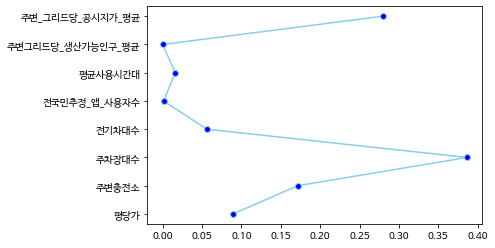

In [ ]:
plt.plot(tree.feature_importances_[:13], X_train_2.columns[:],
         color='skyblue',
         marker='o', markerfacecolor='blue',
         markersize=6)

In [ ]:
len(tree.feature_importances_[:13])

8

#### 2-1) Shap Value

In [ ]:
class TreeShap():
    def __init__(self, model):
        self.model = model
        self.phi_0 = None
        self.phi_ = None

    def powerset(self, l):
        x = len(l)
        res = []
        for i in range(1 << x):
            temp = [l[j] for j in range(x) if (i & (1 << j))]
            res.append(temp)
        return res

    def get_f_s(self, model, x, s):
        def pv(node, w): ## get predicted value
            left_child = model.tree_.children_left[node]
            right_child = model.tree_.children_right[node]
            if left_child == right_child:  # node is a leaf
                return w*model.tree_.value[node].squeeze()
            else: # internal node
                feature = model.tree_.feature[node]
                if feature in s:
                    if x[feature] <= model.tree_.threshold[node]:
                        return pv(left_child, w)
                    else:
                        return pv(right_child, w)
                else:
                    w_left = model.tree_.n_node_samples[left_child] / model.tree_.n_node_samples[node]
                    w_right = model.tree_.n_node_samples[right_child] / model.tree_.n_node_samples[node]
                    return pv(left_child, w * w_left) + pv(right_child, w * w_right)
        return pv(0,1)

    def shap_values(self, x):
        model = self.model
        self.phi_0 = self.get_f_s(model, x, [])
        phi_ = []
        missing_idx_set = set(np.where(pd.isna(x))[0])
        for i, val in enumerate(x):
            if pd.isna(val):
                phi_.append(0)
            else:
                p = data.shape[1]
                target_set = set(range(p))-{i}
                if missing_idx_set:
                    target_set = target_set - missing_idx_set
                    p = p-len(missing_idx_set)
                target_set = list(target_set)
                all_subset = self.powerset(target_set)
                temp_phi = 0
                for s in all_subset:
                    temp_val = self.get_f_s(model, x, s+[i]) - self.get_f_s(model, x, s)
                    temp_val = factorial(len(s))*factorial(p-len(s)-1)/factorial(p)*temp_val
                    temp_phi += temp_val
                phi_.append(temp_phi)

        self.phi_ = phi_
        return (self.phi_0, self.phi_)

    def predict(self, x):
        model = self.model
        if len(np.where(pd.isna(x))[0]) == 0:
            x = np.expand_dims(x, axis=0)
            return self.model.predict(x)[0]
        else:
            idx = np.where(~pd.isna(x))[0]
            return self.get_f_s(model, x, idx)

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

## 예측 모형 모형 적합
model = DecisionTreeRegressor(max_depth=4, random_state=0).fit(X, y)

## TreeSHAP 클래스 초기화
tree_shap = TreeShap(model)

In [ ]:
explainer = shap.TreeExplainer(tree)
tree_shap_values = explainer.shap_values(X_train_2)
print('Expected Values :', explainer.expected_value[0])
print('Shap Values :', tree_shap_values)

Expected Values : -0.015543596284231817
Shap Values : [[ 0.04985425 -0.12817667 -0.32420254 -0.05689596 -0.00267163  0.03786197
   0.         -0.46907218]
 [ 0.07452     0.28379528 -0.63772332 -0.26457153 -0.00267163 -0.00582492
   0.          0.13239512]
 [ 0.03439081  0.0771764   0.22787325  0.04341709 -0.00138945 -0.01217938
   0.         -0.05094567]
 [ 0.10639212  0.4676967   0.06245625  0.15874292 -0.00267163 -0.03786197
   0.         -0.36199009]
 [ 0.02784806 -0.12563609  0.3888598   0.01748648 -0.00138945  0.01217938
   0.         -0.00100511]
 [ 0.10639212  0.50050022 -0.50259445  0.15874292 -0.00267163  0.00582492
   0.          0.1265702 ]
 [ 0.02784806 -0.12563609  0.3888598   0.01748648 -0.00138945  0.01217938
   0.         -0.00100511]
 [ 0.08057002 -0.18700158 -0.32903256  0.03413758 -0.00267163  0.00582492
   0.          0.11153529]
 [ 0.03439081  0.0771764   0.23475725  0.04341709 -0.00138945  0.01217938
   0.         -0.08218842]
 [ 0.07637893 -0.07142561 -0.3493839 

Glyph 8722 missing from current font.
Glyph 8722 missing from current font.


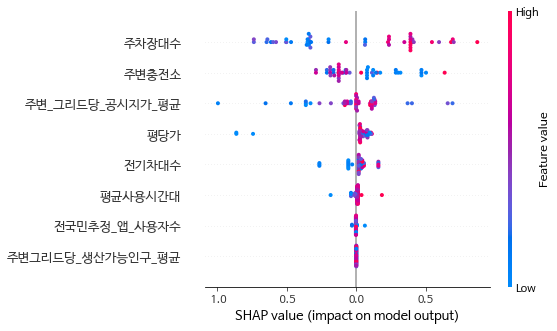

In [ ]:
shap.summary_plot(tree_shap_values, X_train_2)

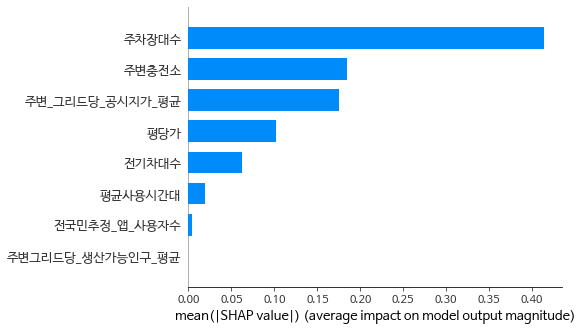

In [ ]:
shap.summary_plot(tree_shap_values, X_train_2, plot_type='bar')

주변그리당_생산가능인구_평균가 영향력이 0이므로 제외한다. 따라서 7가지 feature를 selection한다

# 2.합성곱 평행이동 학습데이터 생성

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 최종데이터.csv to 최종데이터.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving QGIS_용인시그리드_데이터.csv to QGIS_용인시그리드_데이터.csv


**최종 데이터 셋 불러오기 (QGIS에서 뽑은 용인시 데이터)**

QGIS에서 뽑은 용인시 데이터와 QGIS에서 뽑은 용인시 그리드 데이터를 위도와 경도에 대해서 조인하는 과정을 거쳤다. 이때 위도 경도값의 소수점 자리수가 달라 조인이 안 됐다. 이를 해결하기 위해 소수점 자리수를 맞춰서 조인하는 과정을 거쳤다.

In [ ]:
df = pd.read_csv('최종데이터.csv', encoding = 'euc-kr')

In [ ]:
df

,long,lat,공시지가,단지 전기차수,주변 충전소 수,주차장 수,평당가,평균 앱 사용자 수,평균 앱사용 시간대,완속충전소개수(y)
0,127.10704,37.24898,306859.56,1.028242,0.098762,40.022862,21043714.00,6.017889,3.689155,7.483954
1,127.09753,37.33998,3069848.21,3.365778,0.514029,205.882898,31358723.25,7.183529,3.683445,6.642494
2,127.12600,37.29140,1647902.01,0.868940,0.148877,34.353956,21940310.33,7.606090,3.559364,12.344389
3,127.12065,37.23280,161896.49,0.123951,0.020706,3.597324,17160509.33,6.060043,3.647104,9.351436
4,127.07536,37.26689,994081.49,0.252548,0.036962,7.476866,25408507.25,6.993432,3.558926,7.138107
...,...,...,...,...,...,...,...,...,...,...
6251,127.09080,37.33275,NaN,1.279205,0.073362,55.565534,38547845.50,6.347274,3.751738,14.719211
6252,127.14861,37.28066,NaN,3.231140,0.496190,163.132407,18581386.75,6.593324,3.688302,8.938948
6253,127.13286,37.27159,NaN,1.384823,0.062248,22.738823,19587629.00,5.779180,3.666310,8.517391
6254,127.12038,37.28598,NaN,0.257096,0.069608,8.815964,24543373.75,6.047967,3.688300,11.599735


In [ ]:
df = df.drop_duplicates()

In [ ]:
df

,long,lat,공시지가,단지 전기차수,주변 충전소 수,주차장 수,평당가,평균 앱 사용자 수,평균 앱사용 시간대,완속충전소개수(y)
0,127.10704,37.24898,306859.56,1.028242,0.098762,40.022862,21043714.00,6.017889,3.689155,7.483954
1,127.09753,37.33998,3069848.21,3.365778,0.514029,205.882898,31358723.25,7.183529,3.683445,6.642494
2,127.12600,37.29140,1647902.01,0.868940,0.148877,34.353956,21940310.33,7.606090,3.559364,12.344389
3,127.12065,37.23280,161896.49,0.123951,0.020706,3.597324,17160509.33,6.060043,3.647104,9.351436
4,127.07536,37.26689,994081.49,0.252548,0.036962,7.476866,25408507.25,6.993432,3.558926,7.138107
...,...,...,...,...,...,...,...,...,...,...
6251,127.09080,37.33275,NaN,1.279205,0.073362,55.565534,38547845.50,6.347274,3.751738,14.719211
6252,127.14861,37.28066,NaN,3.231140,0.496190,163.132407,18581386.75,6.593324,3.688302,8.938948
6253,127.13286,37.27159,NaN,1.384823,0.062248,22.738823,19587629.00,5.779180,3.666310,8.517391
6254,127.12038,37.28598,NaN,0.257096,0.069608,8.815964,24543373.75,6.047967,3.688300,11.599735


In [ ]:
df[['long','lat ']] = round(df[['long','lat']],5)

In [ ]:
df

,long,lat,공시지가,단지 전기차수,주변 충전소 수,주차장 수,평당가,평균 앱 사용자 수,평균 앱사용 시간대,완속충전소개수(y),lat
0,127.10704,37.24898,306859.56,1.028242,0.098762,40.022862,21043714.00,6.017889,3.689155,7.483954,37.24898
1,127.09753,37.33998,3069848.21,3.365778,0.514029,205.882898,31358723.25,7.183529,3.683445,6.642494,37.33998
2,127.12600,37.29140,1647902.01,0.868940,0.148877,34.353956,21940310.33,7.606090,3.559364,12.344389,37.29140
3,127.12065,37.23280,161896.49,0.123951,0.020706,3.597324,17160509.33,6.060043,3.647104,9.351436,37.23280
4,127.07536,37.26689,994081.49,0.252548,0.036962,7.476866,25408507.25,6.993432,3.558926,7.138107,37.26689
...,...,...,...,...,...,...,...,...,...,...,...
6251,127.09080,37.33275,NaN,1.279205,0.073362,55.565534,38547845.50,6.347274,3.751738,14.719211,37.33275
6252,127.14861,37.28066,NaN,3.231140,0.496190,163.132407,18581386.75,6.593324,3.688302,8.938948,37.28066
6253,127.13286,37.27159,NaN,1.384823,0.062248,22.738823,19587629.00,5.779180,3.666310,8.517391,37.27159
6254,127.12038,37.28598,NaN,0.257096,0.069608,8.815964,24543373.75,6.047967,3.688300,11.599735,37.28598


In [ ]:
df1 = pd.read_csv('QGIS_용인시그리드_데이터.csv')

In [ ]:
df1

,Unnamed: 0,index,long,lat
0,0,1,127.190204,37.315926
1,1,2,127.033140,37.346959
2,2,3,127.233626,37.163695
3,3,4,127.166464,37.324876
4,4,5,127.197044,37.298817
...,...,...,...,...
64765,66451,66452,127.159347,37.150885
64766,66452,66453,127.256184,37.153828
64767,66453,66454,127.141646,37.322099
64768,66454,66455,127.183448,37.312303


In [ ]:
df1[['long','lat']] = round(df1[['long','lat']],5)

In [ ]:
df1 = df1.drop_duplicates()

In [ ]:
df1

,Unnamed: 0,index,long,lat
0,0,1,127.19020,37.31593
1,1,2,127.03314,37.34696
2,2,3,127.23363,37.16369
3,3,4,127.16646,37.32488
4,4,5,127.19704,37.29882
...,...,...,...,...
64765,66451,66452,127.15935,37.15088
64766,66452,66453,127.25618,37.15383
64767,66453,66454,127.14165,37.32210
64768,66454,66455,127.18345,37.31230


In [ ]:
df_new = pd.merge(df, df1, on = ['long', 'lat'], how = 'outer')

In [ ]:
df_new

,long,lat,공시지가,단지 전기차수,주변 충전소 수,주차장 수,평당가,평균 앱 사용자 수,평균 앱사용 시간대,완속충전소개수(y),lat,Unnamed: 0,index
0,127.10704,37.24898,306859.56,1.028242,0.098762,40.022862,21043714.00,6.017889,3.689155,7.483954,37.24898,58127.0,58128.0
1,127.09753,37.33998,3069848.21,3.365778,0.514029,205.882898,31358723.25,7.183529,3.683445,6.642494,37.33998,58125.0,58126.0
2,127.12600,37.29140,1647902.01,0.868940,0.148877,34.353956,21940310.33,7.606090,3.559364,12.344389,37.29140,58116.0,58117.0
3,127.12065,37.23280,161896.49,0.123951,0.020706,3.597324,17160509.33,6.060043,3.647104,9.351436,37.23280,58115.0,58116.0
4,127.07536,37.26689,994081.49,0.252548,0.036962,7.476866,25408507.25,6.993432,3.558926,7.138107,37.26689,58110.0,58111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64802,127.15935,37.15088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66451.0,66452.0
64803,127.25618,37.15383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66452.0,66453.0
64804,127.14165,37.32210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66453.0,66454.0
64805,127.18345,37.31230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66454.0,66455.0


In [ ]:
df_n = pd.merge(df_new, df1, on = ['long', 'lat'])

In [ ]:
df_n

,long,lat,공시지가,단지 전기차수,주변 충전소 수,주차장 수,평당가,평균 앱 사용자 수,평균 앱사용 시간대,완속충전소개수(y),lat,Unnamed: 0_x,index_x,Unnamed: 0_y,index_y
0,127.10704,37.24898,306859.56,1.028242,0.098762,40.022862,21043714.00,6.017889,3.689155,7.483954,37.24898,58127.0,58128.0,58127,58128
1,127.09753,37.33998,3069848.21,3.365778,0.514029,205.882898,31358723.25,7.183529,3.683445,6.642494,37.33998,58125.0,58126.0,58125,58126
2,127.12600,37.29140,1647902.01,0.868940,0.148877,34.353956,21940310.33,7.606090,3.559364,12.344389,37.29140,58116.0,58117.0,58116,58117
3,127.12065,37.23280,161896.49,0.123951,0.020706,3.597324,17160509.33,6.060043,3.647104,9.351436,37.23280,58115.0,58116.0,58115,58116
4,127.07536,37.26689,994081.49,0.252548,0.036962,7.476866,25408507.25,6.993432,3.558926,7.138107,37.26689,58110.0,58111.0,58110,58111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64765,127.15935,37.15088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66451.0,66452.0,66451,66452
64766,127.25618,37.15383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66452.0,66453.0,66452,66453
64767,127.14165,37.32210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66453.0,66454.0,66453,66454
64768,127.18345,37.31230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66454.0,66455.0,66454,66455


In [ ]:
df_n = df_n.fillna(0)

In [ ]:
df_n.columns

Index(['long', 'lat', '공시지가', '단지 전기차수', '주변 충전소 수', '주차장 수', '평당가',
       '평균 앱 사용자 수', '평균 앱사용 시간대', '완속충전소개수(y)', 'lat ', 'Unnamed: 0_x',
       'index_x', 'Unnamed: 0_y', 'index_y'],
      dtype='object')

In [ ]:
df_n = df_n[['long', 'lat', '공시지가', '단지 전기차수', '주변 충전소 수', '주차장 수', '평당가',
       '평균 앱 사용자 수', '평균 앱사용 시간대', '완속충전소개수(y)']]

위도 경도 값을 정렬한다.

In [ ]:
df_n= df_n.sort_values(by=["lat", "long"], ascending=[False,False])

In [ ]:
df_n

,long,lat,공시지가,단지 전기차수,주변 충전소 수,주차장 수,평당가,평균 앱 사용자 수,평균 앱사용 시간대,완속충전소개수(y)
36718,127.30859,37.36305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34607,127.30746,37.36305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30779,127.30633,37.36305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36009,127.30520,37.36304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34777,127.30407,37.36304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
36842,127.02883,37.13331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32401,127.02770,37.13331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35603,127.02657,37.13330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40171,127.02545,37.13330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


평행이동 전 데이터(용인시 데이터 + QGIS 그리드) 불러오기

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 평행이동_전데이터.csv to 평행이동_전데이터.csv


In [ ]:
df = pd.read_csv('평행이동_전데이터.csv', encoding='utf-8')

In [ ]:
df

,Unnamed: 0,long,lat,공시지가,단지 전기차수,주변 충전소 수,주차장 수,평당가,평균 앱 사용자 수,평균 앱사용 시간대,완속충전소개수(y)
0,36718,127.30859,37.36305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,34607,127.30746,37.36305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30779,127.30633,37.36305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36009,127.30520,37.36304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,34777,127.30407,37.36304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
64765,36842,127.02883,37.13331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64766,32401,127.02770,37.13331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64767,35603,127.02657,37.13330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64768,40171,127.02545,37.13330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'long', 'lat', '공시지가', '단지 전기차수', '주변 충전소 수', '주차장 수',
       '평당가', '평균 앱 사용자 수', '평균 앱사용 시간대', '완속충전소개수(y)'],
      dtype='object')

In [ ]:
df = df[['공시지가', '단지 전기차수', '주변 충전소 수', '주차장 수', '평당가',
       '평균 앱 사용자 수', '평균 앱사용 시간대', '완속충전소개수(y)']]

In [ ]:
df

,공시지가,단지 전기차수,주변 충전소 수,주차장 수,평당가,평균 앱 사용자 수,평균 앱사용 시간대,완속충전소개수(y)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
64765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


합성곱을 활용한 평행이동

평행이동을 각 그리드의 중점으로 움직였다는 가정(그리드의 1/4 움직였다는 가정)

커널을 1/4씩 설정

In [ ]:
kernel_in = np.array([
 [ [[1/4]], [[1/4]]],
 [ [[1/4]], [[1/4]]]
 ])

각 열 값들을 불러오고 tf.nn.conv2d에 넣을 수 있도록 조정함

conv2d에 넣고 그 값을 다시 열로 변형함

In [ ]:
a = df['공시지가'].array
a = a.reshape(254, 255, 1, 1)
a = np.transpose(a)
x = tf.constant(a, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
a = tf.nn.conv2d(x, kernel, strides=[1, 1,1, 1], padding='SAME')
a = np.ravel(a, order='C')
s = pd.Series(a)

In [ ]:
b = df['단지 전기차수'].array
b = b.reshape(254, 255, 1, 1)
b = np.transpose(b)
x = tf.constant(b, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
b = tf.nn.conv2d(x, kernel, strides=[1, 1,1, 1], padding='SAME')
b = np.ravel(b, order='C')
p = pd.Series(b)

In [ ]:
c = df['주변 충전소 수'].array
c = c.reshape(254, 255, 1, 1)
c = np.transpose(c)
x = tf.constant(c, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
c = tf.nn.conv2d(x, kernel, strides=[1, 1,1, 1], padding='SAME')
c = np.ravel(c, order='C')
o = pd.Series(c)

In [ ]:
d = df['주차장 수'].array
d = d.reshape(254, 255, 1, 1)
d = np.transpose(d)
x = tf.constant(d, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
d = tf.nn.conv2d(x, kernel, strides=[1, 1,1, 1], padding='SAME')
d = np.ravel(d, order='C')
q = pd.Series(d)

In [ ]:
e = df['평당가'].array
e = e.reshape(254, 255, 1, 1)
e = np.transpose(e)
x = tf.constant(e, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
e = tf.nn.conv2d(x, kernel, strides=[1, 1,1, 1], padding='SAME')
e = np.ravel(e, order='C')
z = pd.Series(e)

In [ ]:
f = df['평균 앱사용 시간대'].array
f = f.reshape(254, 255, 1, 1)
f = np.transpose(f)
x = tf.constant(f, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
f = tf.nn.conv2d(x, kernel, strides=[1, 1,1, 1], padding='SAME')
f = np.ravel(f, order='C')
j = pd.Series(f)

In [ ]:
g = df['평균 앱 사용자 수'].array
g = g.reshape(254, 255, 1, 1)
g = np.transpose(g)
x = tf.constant(g, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
g = tf.nn.conv2d(x, kernel, strides=[1, 1,1, 1], padding='SAME')
g = np.ravel(g, order='C')
l = pd.Series(g)

In [ ]:
h = df['완속충전소개수(y)'].array
h = h.reshape(254, 255, 1, 1)
h = np.transpose(h)
x = tf.constant(h, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
h = tf.nn.conv2d(x, kernel, strides=[1, 1,1, 1], padding='SAME')
h = np.ravel(h, order='C')
m = pd.Series(h)

In [ ]:
df_c = pd.DataFrame({'공시지가': s, '단지 전기차수': p, '주변 충전소 수': o, '주차장 수': q,'평당가':  z,'평균 앱사용 시간대': j, '평균 앱 사용자 수':l, '완속충전소개수(y)':m })

In [ ]:
df_c

,공시지가,단지 전기차수,주변 충전소 수,주차장 수,평당가,평균 앱사용 시간대,평균 앱 사용자 수,완속충전소개수(y)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
64765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


평행이동 정도를 kernel의 weight값을 조정함으로써 구함

In [ ]:
kernel_in = np.array([
 [ [[1/8]], [[1/8]]],
 [ [[3/8]], [[3/8]]]
 ])

In [ ]:
a = df['공시지가'].array
a = a.reshape(254, 255, 1, 1)
a = np.transpose(a)
x = tf.constant(a, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
a = tf.nn.conv2d(x, kernel, strides=[1, 1,1, 1], padding='SAME')
a = np.ravel(a, order='C')
s = pd.Series(a)

In [ ]:
b = df['단지 전기차수'].array
b = b.reshape(254, 255, 1, 1)
b = np.transpose(b)
x = tf.constant(b, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
b = tf.nn.conv2d(x, kernel, strides=[1, 1,1, 1], padding='SAME')
b = np.ravel(b, order='C')
p = pd.Series(b)

In [ ]:
c = df['주변 충전소 수'].array
c = c.reshape(254, 255, 1, 1)
c = np.transpose(c)
x = tf.constant(c, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
c = tf.nn.conv2d(x, kernel, strides=[1, 1,1, 1], padding='SAME')
c = np.ravel(c, order='C')
o = pd.Series(c)

In [ ]:
d = df['주차장 수'].array
d = d.reshape(254, 255, 1, 1)
d = np.transpose(d)
x = tf.constant(d, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
d = tf.nn.conv2d(x, kernel, strides=[1, 1,1, 1], padding='SAME')
d = np.ravel(d, order='C')
q = pd.Series(d)

In [ ]:
e = df['평당가'].array
e = e.reshape(254, 255, 1, 1)
e = np.transpose(e)
x = tf.constant(e, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
e = tf.nn.conv2d(x, kernel, strides=[1, 1,1, 1], padding='SAME')
e = np.ravel(e, order='C')
z = pd.Series(e)

In [ ]:
f = df['평균 앱사용 시간대'].array
f = f.reshape(254, 255, 1, 1)
f = np.transpose(f)
x = tf.constant(f, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
f = tf.nn.conv2d(x, kernel, strides=[1, 1,1, 1], padding='SAME')
f = np.ravel(f, order='C')
j = pd.Series(f)

In [ ]:
g = df['평균 앱 사용자 수'].array
g = g.reshape(254, 255, 1, 1)
g = np.transpose(g)
x = tf.constant(g, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
g = tf.nn.conv2d(x, kernel, strides=[1, 1,1, 1], padding='SAME')
g = np.ravel(g, order='C')
l = pd.Series(g)

In [ ]:
h = df['완속충전소개수(y)'].array
h = h.reshape(254, 255, 1, 1)
h = np.transpose(h)
x = tf.constant(h, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
h = tf.nn.conv2d(x, kernel, strides=[1, 1,1, 1], padding='SAME')
h = np.ravel(h, order='C')
m = pd.Series(h)

In [ ]:
df_d = pd.DataFrame({'공시지가': s, '단지 전기차수': p, '주변 충전소 수': o, '주차장 수': q,'평당가':  z,'평균 앱사용 시간대': j, '평균 앱 사용자 수':l, '완속충전소개수(y)':m })

In [ ]:
df_d

,공시지가,단지 전기차수,주변 충전소 수,주차장 수,평당가,평균 앱사용 시간대,평균 앱 사용자 수,완속충전소개수(y)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
64765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
kernel_in = np.array([
 [ [[1/8]], [[3/8]]],
 [ [[1/8]], [[3/8]]]
 ])

In [ ]:
a = df['공시지가'].array
a = a.reshape(254, 255, 1, 1)
a = np.transpose(a)
x = tf.constant(a, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
a = tf.nn.conv2d(x, kernel, strides=[1, 1,1, 1], padding='SAME')
a = np.ravel(a, order='C')
s = pd.Series(a)

In [ ]:
b = df['단지 전기차수'].array
b = b.reshape(254, 255, 1, 1)
b = np.transpose(b)
x = tf.constant(b, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
b = tf.nn.conv2d(x, kernel, strides=[1, 1,1, 1], padding='SAME')
b = np.ravel(b, order='C')
p = pd.Series(b)

In [ ]:
c = df['주변 충전소 수'].array
c = c.reshape(254, 255, 1, 1)
c = np.transpose(c)
x = tf.constant(c, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
c = tf.nn.conv2d(x, kernel, strides=[1, 1,1, 1], padding='SAME')
c = np.ravel(c, order='C')
o = pd.Series(c)

In [ ]:
d = df['주차장 수'].array
d = d.reshape(254, 255, 1, 1)
d = np.transpose(d)
x = tf.constant(d, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
d = tf.nn.conv2d(x, kernel, strides=[1, 1,1, 1], padding='SAME')
d = np.ravel(d, order='C')
q = pd.Series(d)

In [ ]:
e = df['평당가'].array
e = e.reshape(254, 255, 1, 1)
e = np.transpose(e)
x = tf.constant(e, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
e = tf.nn.conv2d(x, kernel, strides=[1, 1,1, 1], padding='SAME')
e = np.ravel(e, order='C')
z = pd.Series(e)

In [ ]:
f = df['평균 앱사용 시간대'].array
f = f.reshape(254, 255, 1, 1)
f = np.transpose(f)
x = tf.constant(f, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
f = tf.nn.conv2d(x, kernel, strides=[1, 1,1, 1], padding='SAME')
f = np.ravel(f, order='C')
j = pd.Series(f)

In [ ]:
g = df['평균 앱 사용자 수'].array
g = g.reshape(254, 255, 1, 1)
g = np.transpose(g)
x = tf.constant(g, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
g = tf.nn.conv2d(x, kernel, strides=[1, 1,1, 1], padding='SAME')
g = np.ravel(g, order='C')
l = pd.Series(g)

In [ ]:
h = df['완속충전소개수(y)'].array
h = h.reshape(254, 255, 1, 1)
h = np.transpose(h)
x = tf.constant(h, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
h = tf.nn.conv2d(x, kernel, strides=[1, 1,1, 1], padding='SAME')
h = np.ravel(h, order='C')
m = pd.Series(h)

In [ ]:
df_e = pd.DataFrame({'공시지가': s, '단지 전기차수': p, '주변 충전소 수': o, '주차장 수': q,'평당가':  z,'평균 앱사용 시간대': j, '평균 앱 사용자 수':l, '완속충전소개수(y)':m })

In [ ]:
kernel_in = np.array([
 [ [[3/8]], [[1/8]]],
 [ [[3/8]], [[1/8]]]
 ])

In [ ]:
a = df['공시지가'].array
a = a.reshape(254, 255, 1, 1)
a = np.transpose(a)
x = tf.constant(a, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
a = tf.nn.conv2d(x, kernel, strides=[1, 1,1, 1], padding='SAME')
a = np.ravel(a, order='C')
s = pd.Series(a)

In [ ]:
b = df['단지 전기차수'].array
b = b.reshape(254, 255, 1, 1)
b = np.transpose(b)
x = tf.constant(b, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
b = tf.nn.conv2d(x, kernel, strides=[1, 1,1, 1], padding='SAME')
b = np.ravel(b, order='C')
p = pd.Series(b)

In [ ]:
c = df['주변 충전소 수'].array
c = c.reshape(254, 255, 1, 1)
c = np.transpose(c)
x = tf.constant(c, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
c = tf.nn.conv2d(x, kernel, strides=[1, 1,1, 1], padding='SAME')
c = np.ravel(c, order='C')
o = pd.Series(c)

In [ ]:
d = df['주차장 수'].array
d = d.reshape(254, 255, 1, 1)
d = np.transpose(d)
x = tf.constant(d, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
d = tf.nn.conv2d(x, kernel, strides=[1, 1,1, 1], padding='SAME')
d = np.ravel(d, order='C')
q = pd.Series(d)

In [ ]:
e = df['평당가'].array
e = e.reshape(254, 255, 1, 1)
e = np.transpose(e)
x = tf.constant(e, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
e = tf.nn.conv2d(x, kernel, strides=[1, 1,1, 1], padding='SAME')
e = np.ravel(e, order='C')
z = pd.Series(e)

In [ ]:
f = df['평균 앱사용 시간대'].array
f = f.reshape(254, 255, 1, 1)
f = np.transpose(f)
x = tf.constant(f, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
f = tf.nn.conv2d(x, kernel, strides=[1, 1,1, 1], padding='SAME')
f = np.ravel(f, order='C')
j = pd.Series(f)

In [ ]:
g = df['평균 앱 사용자 수'].array
g = g.reshape(254, 255, 1, 1)
g = np.transpose(g)
x = tf.constant(g, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
g = tf.nn.conv2d(x, kernel, strides=[1, 1,1, 1], padding='SAME')
g = np.ravel(g, order='C')
l = pd.Series(g)

In [ ]:
h = df['완속충전소개수(y)'].array
h = h.reshape(254, 255, 1, 1)
h = np.transpose(h)
x = tf.constant(h, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
h = tf.nn.conv2d(x, kernel, strides=[1, 1,1, 1], padding='SAME')
h = np.ravel(h, order='C')
m = pd.Series(h)

In [ ]:
df_f = pd.DataFrame({'공시지가': s, '단지 전기차수': p, '주변 충전소 수': o, '주차장 수': q,'평당가':  z,'평균 앱사용 시간대': j, '평균 앱 사용자 수':l, '완속충전소개수(y)':m })

In [ ]:
df_all = pd.concat([df_c, df_d, df_e, df_f])

In [ ]:
df_all

,공시지가,단지 전기차수,주변 충전소 수,주차장 수,평당가,평균 앱사용 시간대,평균 앱 사용자 수,완속충전소개수(y)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
64765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_all = df_all[df_all['단지 전기차수']!=0]

In [ ]:
df_all

,공시지가,단지 전기차수,주변 충전소 수,주차장 수,평당가,평균 앱사용 시간대,평균 앱 사용자 수,완속충전소개수(y)
498,150159.437500,0.015274,0.015077,0.765083,7003252.0,0.914824,1.679999,2.168175
499,240512.718750,0.024956,0.025972,1.301895,13999256.0,1.835684,3.382957,4.338552
500,225174.031250,0.021148,0.026930,1.190051,13984810.0,1.842839,3.409832,4.342675
501,186482.562500,0.023226,0.037296,1.284824,13970455.0,1.844314,3.414661,4.346294
502,51661.820312,0.011760,0.021261,0.631585,6981649.5,0.922335,1.707787,2.173996
...,...,...,...,...,...,...,...,...
63852,197868.281250,0.290252,0.000926,1.825789,4628629.0,1.279264,1.616690,3.603852
64102,67085.351562,0.384143,0.000975,2.396955,5334496.0,1.384818,1.849313,3.584086
64103,137572.812500,0.728463,0.001795,4.539950,10518442.0,2.670821,3.667791,7.189583
64104,152446.500000,0.790047,0.002087,4.934982,10213877.0,2.543659,3.632097,7.199714
